In [ ]:
import numpy as np
import pandas as pd

#Pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

#Preprocessing/transformations
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import FunctionTransformer
from category_encoders import TargetEncoder

#Error measurements
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

#Visualisations
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Models
# kNN
from sklearn.neighbors import KNeighborsClassifier
# NB
from sklearn.naive_bayes import GaussianNB
# svm
from sklearn.svm import SVC
#DT
from sklearn.tree import DecisionTreeClassifier
# adaboost
from sklearn.ensemble import AdaBoostClassifier
#GB
from sklearn.ensemble import GradientBoostingClassifier
# linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.neural_network import MLPerceptron
from sklearn.neural_network import MLPClassifier
# logRegression
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

#for visualisation help
%run cleaning_visualisation_functions.ipynb

from scipy.stats import gaussian_kde

In [ ]:
#load data

playerStats = pd.read_csv('playerStats.csv', index_col = 'Unnamed: 0')
allmatch = pd.read_csv('allMatches.csv', index_col = 'Unnamed: 0')

In [ ]:
playerStats

,matchID,Court,min_fromNet,avg_fromNet,max_fromNet,std_fromNet,min_fromCentre,avg_fromCentre,max_fromCentret,std_fromCentret,...,avg_Acceleration,max_Acceleration,std_Acceleration,frontHalf,backHalf,behindLine,rallyLength,Winner,Gender,Server
0,1,1.0,257.303962,842.355322,1381.306329,384.882164,47.510460,141.997342,301.441752,88.165214,...,11.231880,117.154114,15.172391,0.361607,0.352679,0.285714,223.0,0,1,1
1,1,0.0,118.382947,838.815764,1482.824234,542.643022,1.213837,151.834926,338.524431,102.532740,...,6.887676,46.048386,8.378737,0.450893,0.116071,0.433036,223.0,1,1,0
2,2,1.0,1202.830806,1259.300150,1329.939874,32.602326,107.532377,260.033812,398.776271,106.736006,...,8.837847,38.331961,7.641369,0.000000,0.000000,1.000000,59.0,0,1,0
3,2,0.0,978.857600,1157.642380,1241.160040,41.132159,22.166075,49.851511,69.591791,10.722623,...,8.791485,123.958240,20.590099,0.000000,0.800000,0.200000,59.0,1,1,1
4,3,1.0,1200.101358,1334.875881,1456.258443,64.326507,0.298514,171.547100,426.579458,114.439209,...,8.548637,57.126621,9.195956,0.000000,0.000000,1.000000,302.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,112,0.0,585.911598,1131.157141,1374.996131,242.876617,0.239456,142.831271,339.372116,85.757297,...,6.042738,41.542115,6.763680,0.071839,0.250000,0.678161,347.0,0,0,1
148,113,1.0,1113.496894,1270.468017,1401.308196,80.562250,8.322169,172.528921,435.356539,103.682961,...,8.498127,83.375083,9.097955,0.000000,0.191781,0.776256,218.0,0,0,1
149,113,0.0,1266.883499,1335.433876,1422.193531,42.223827,38.432208,226.598835,361.648193,99.367108,...,4.592303,24.162680,4.391573,0.000000,0.000000,1.000000,218.0,1,0,0
150,120,1.0,1174.285340,1353.922462,1524.811112,110.496868,3.305924,157.383887,360.817659,94.314922,...,9.800268,58.248970,12.225762,0.000000,0.100000,0.900000,319.0,0,0,1


In [ ]:
winners = allmatch[allmatch['Winner'] == 1]
losers = allmatch[allmatch['Winner'] == 0]

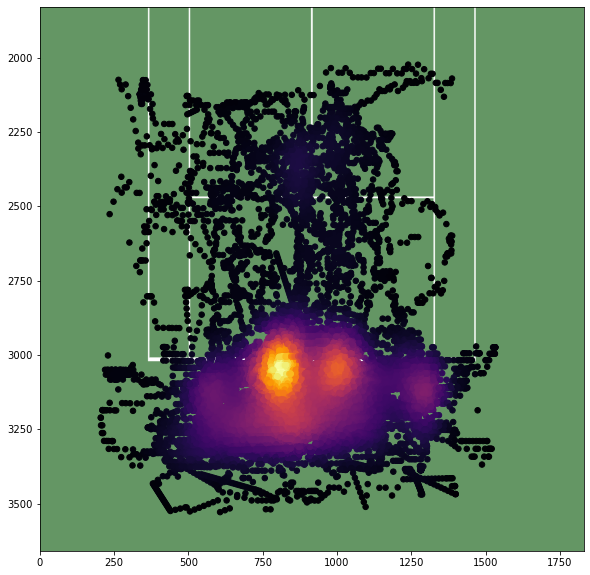

In [ ]:
plotDensity(losers)

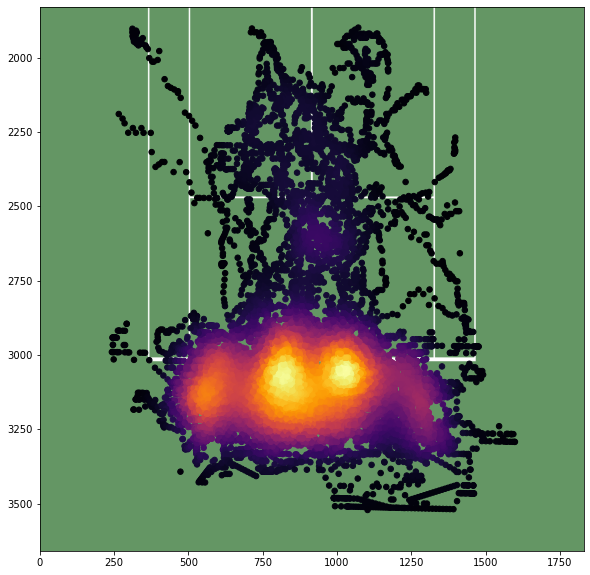

In [ ]:
plotDensity(winners)

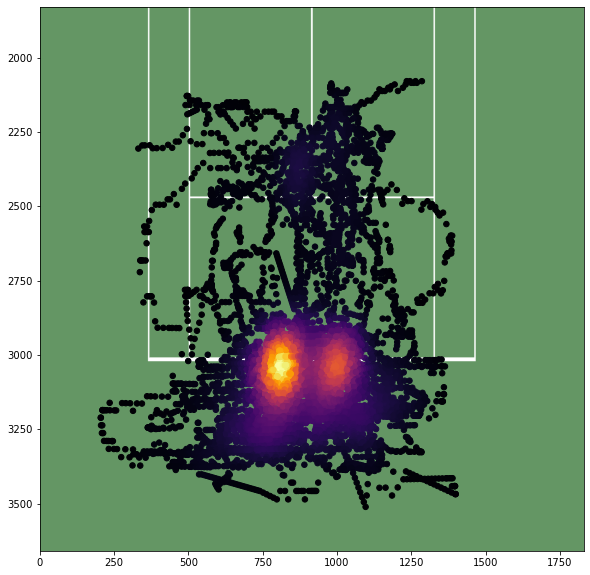

In [ ]:
plotDensity(allmatch[(allmatch['Server'] == 1) & (allmatch['Winner'] == 0)])

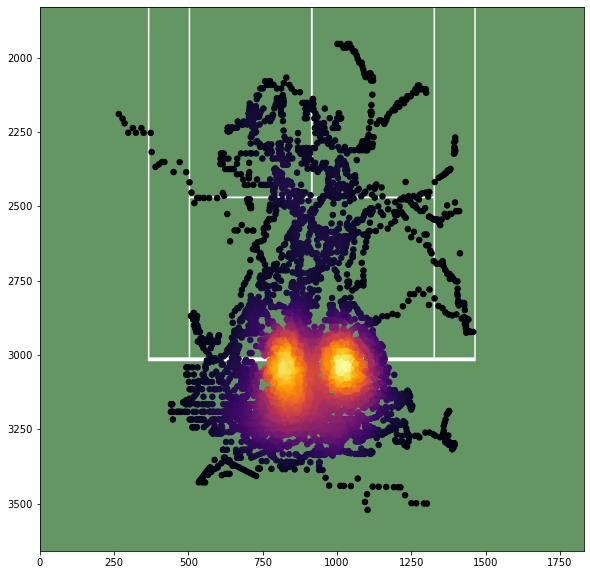

In [ ]:
plotDensity(allmatch[(allmatch['Server'] == 1) & (allmatch['Winner'] == 1)])

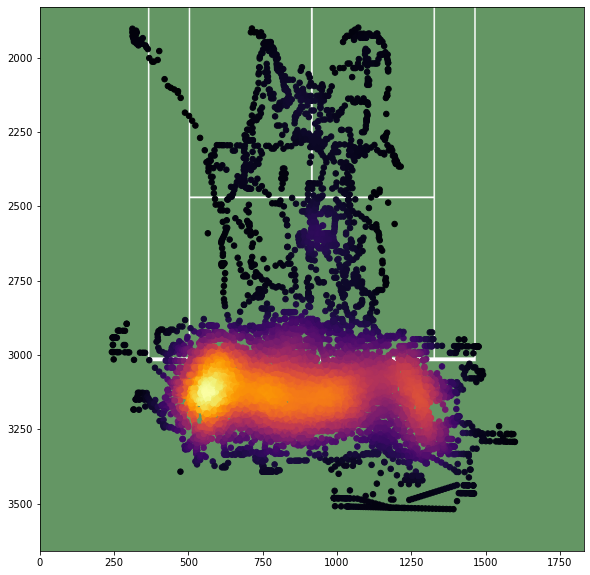

In [ ]:
plotDensity(allmatch[(allmatch['Server'] == 0) & (allmatch['Winner'] == 1)])

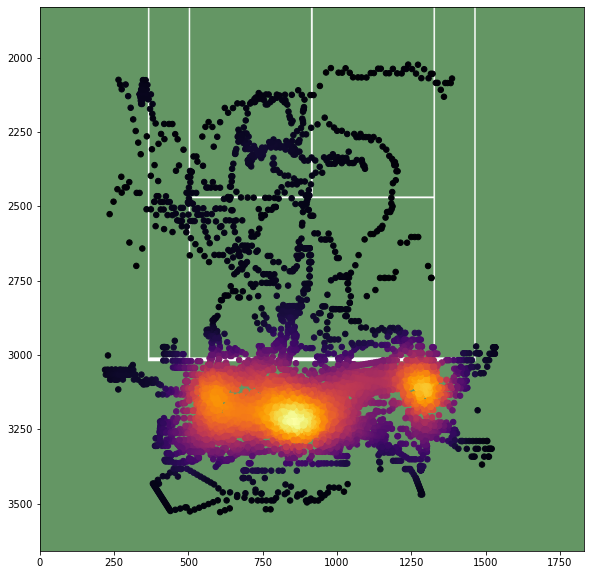

In [ ]:
plotDensity(allmatch[(allmatch['Server'] == 0) & (allmatch['Winner'] == 0)])

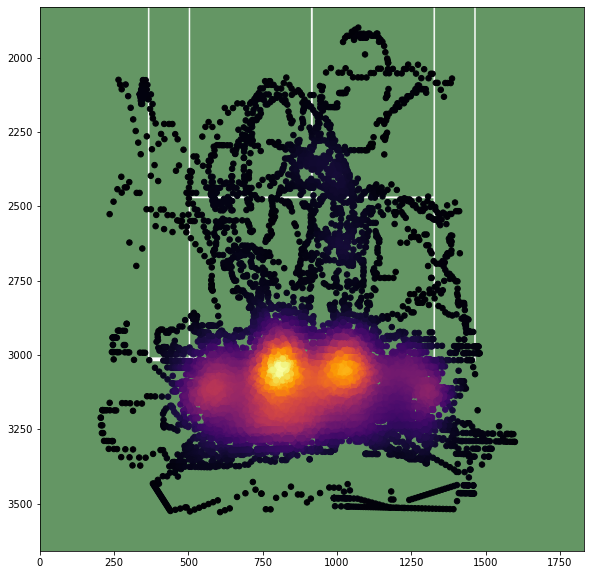

In [ ]:
plotDensity(allmatch[allmatch['Gender'] == 0])

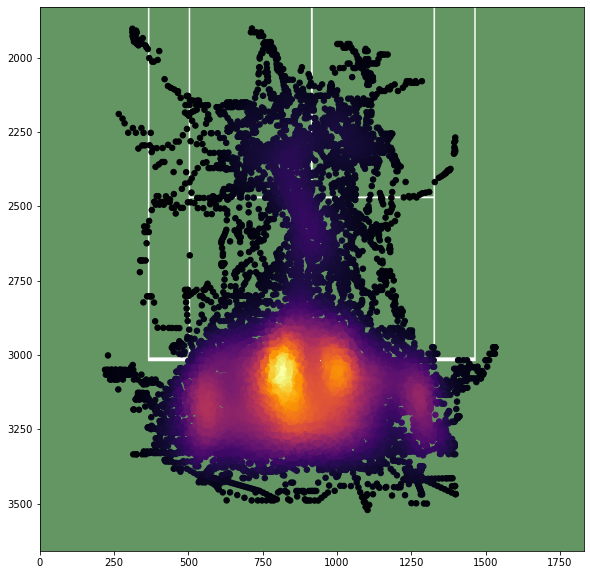

In [ ]:
plotDensity(allmatch[allmatch['Gender'] == 1])

In [ ]:
playerStats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 151
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   matchID           152 non-null    int64  
 1   Court             152 non-null    float64
 2   min_fromNet       152 non-null    float64
 3   avg_fromNet       152 non-null    float64
 4   max_fromNet       152 non-null    float64
 5   std_fromNet       152 non-null    float64
 6   min_fromCentre    152 non-null    float64
 7   avg_fromCentre    152 non-null    float64
 8   max_fromCentret   152 non-null    float64
 9   std_fromCentret   152 non-null    float64
 10  avg_dist          152 non-null    float64
 11  max_dist          152 non-null    float64
 12  std_dist          152 non-null    float64
 13  avg_Acceleration  152 non-null    float64
 14  max_Acceleration  152 non-null    float64
 15  std_Acceleration  152 non-null    float64
 16  frontHalf         152 non-null    float64
 1

In [ ]:
# matchID, Court not relevant, to drop. Winner column is the target variable

playerStats = playerStats.drop(['matchID','Court','Gender'],axis=1)

KeyError: "['matchID' 'Court' 'Gender'] not found in axis"

In [ ]:
# Balance of classes in target variable
playerStats.Winner.value_counts()

0    76
1    76
Name: Winner, dtype: int64

In [ ]:
train, test = train_test_split(playerStats, test_size= 0.2, random_state = 0)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 89 to 47
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   min_fromNet       121 non-null    float64
 1   avg_fromNet       121 non-null    float64
 2   max_fromNet       121 non-null    float64
 3   std_fromNet       121 non-null    float64
 4   min_fromCentre    121 non-null    float64
 5   avg_fromCentre    121 non-null    float64
 6   max_fromCentret   121 non-null    float64
 7   std_fromCentret   121 non-null    float64
 8   avg_dist          121 non-null    float64
 9   max_dist          121 non-null    float64
 10  std_dist          121 non-null    float64
 11  avg_Acceleration  121 non-null    float64
 12  max_Acceleration  121 non-null    float64
 13  std_Acceleration  121 non-null    float64
 14  frontHalf         121 non-null    float64
 15  backHalf          121 non-null    float64
 16  behindLine        121 non-null    float64
 1

In [ ]:

'''
129 instances
2 binary variables and 17 numerical variables.
Note that Gender will not be useful as a predictor as all matches are between the same gender in the rallies.
'''

bina = ['Server']#'Gender',
num = train.select_dtypes(include='float64').columns

### Numerical Features

In [ ]:
train[num].describe()

,min_fromNet,avg_fromNet,max_fromNet,std_fromNet,min_fromCentre,avg_fromCentre,max_fromCentret,std_fromCentret,avg_dist,max_dist,std_dist,avg_Acceleration,max_Acceleration,std_Acceleration,frontHalf,backHalf,behindLine,rallyLength
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,816.007795,1194.339027,1428.993044,187.764217,16.076443,191.107969,397.520492,107.503852,12.557304,84.962398,12.182834,8.400456,70.588967,10.661730,0.079666,0.232984,0.686278,242.950413
std,382.717929,168.362993,113.566922,128.412473,58.408145,83.277655,129.027720,37.847927,3.050752,48.783475,4.634537,2.576779,45.887372,4.647350,0.128288,0.199028,0.262876,76.961121
min,69.626702,760.640733,1228.166417,32.602326,0.000000,49.851511,69.591791,10.722623,5.416292,17.628882,4.207085,2.737166,9.680417,2.511476,0.000000,0.000000,0.041935,34.000000
25%,450.901825,1081.854284,1345.334268,77.749806,0.445220,140.311562,319.881920,78.477445,10.374448,55.321246,9.139278,6.249944,43.926445,7.525252,0.000000,0.068826,0.501326,205.000000
50%,1028.927636,1225.351221,1424.289928,144.873660,1.373609,170.876400,389.764019,114.439209,12.175590,69.960312,10.962663,8.215558,54.671281,9.688689,0.000000,0.182609,0.718833,243.000000
75%,1140.956384,1334.875881,1504.663594,294.804098,3.916911,241.792430,482.945673,138.065714,14.779012,88.021360,13.665374,10.111522,73.428944,12.193442,0.140468,0.361272,0.931174,298.000000
max,1429.932454,1502.330037,1691.703026,542.643022,376.032948,559.578900,694.813438,183.432063,25.344690,245.697223,29.424854,15.544235,242.333956,29.985096,0.517588,0.843137,1.000000,376.000000


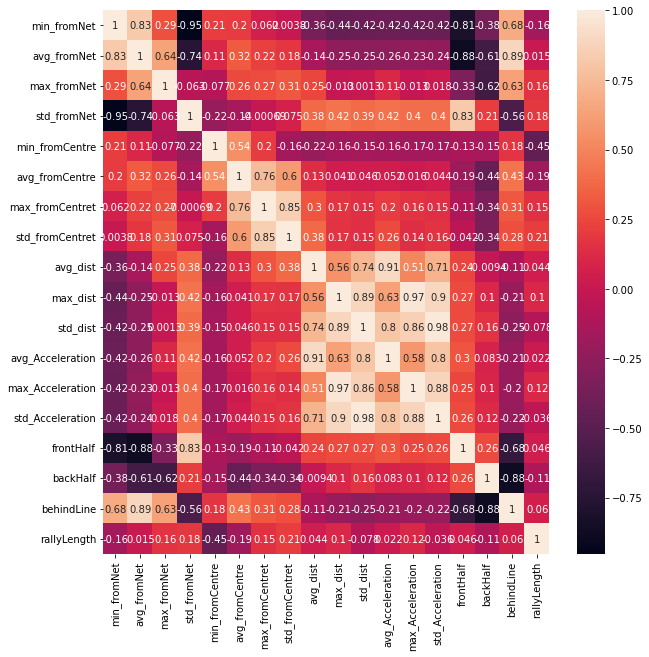

In [ ]:
fig = plt.figure(figsize=(10,10))
dataplot = sns.heatmap(train[num].corr(), annot = True)
plt.show()

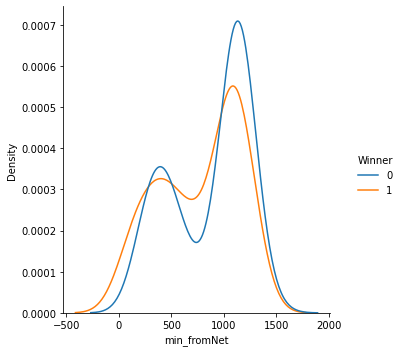

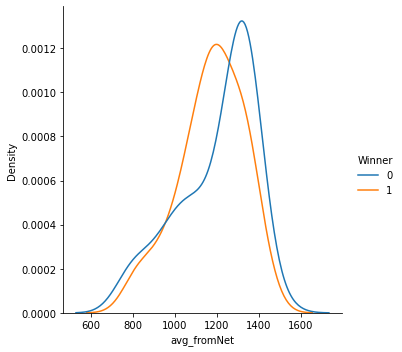

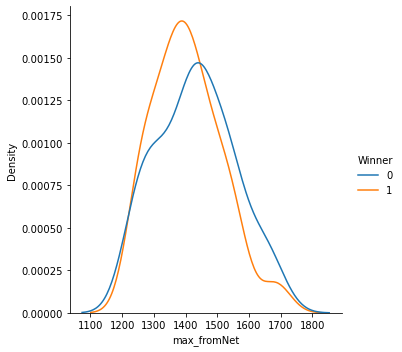

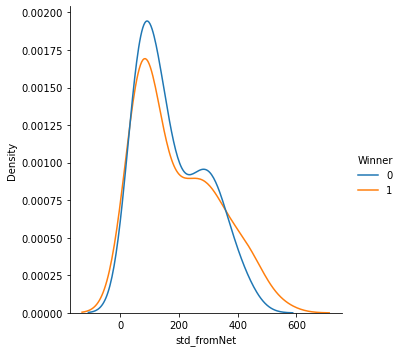

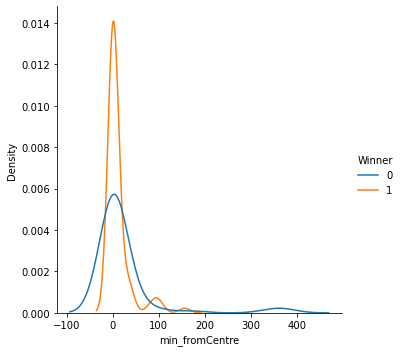

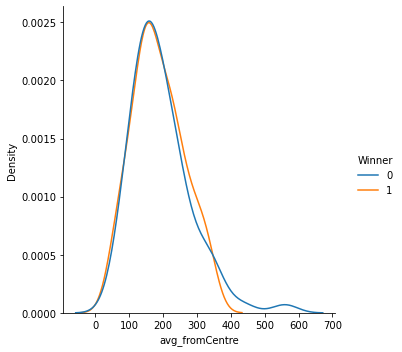

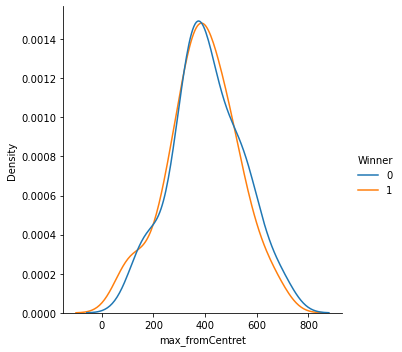

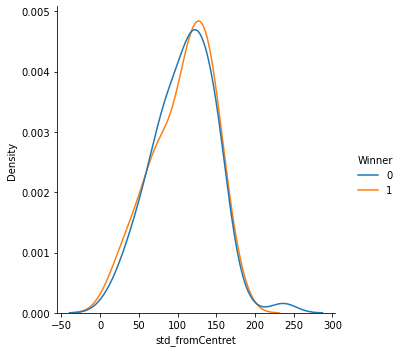

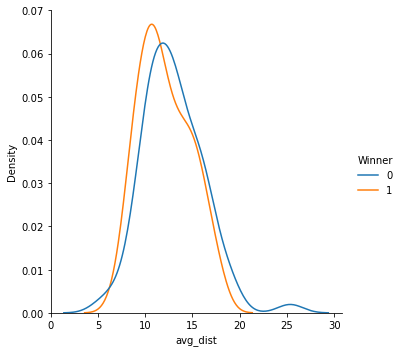

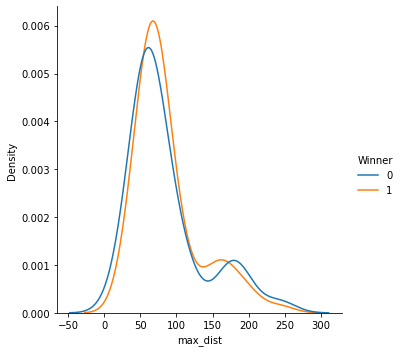

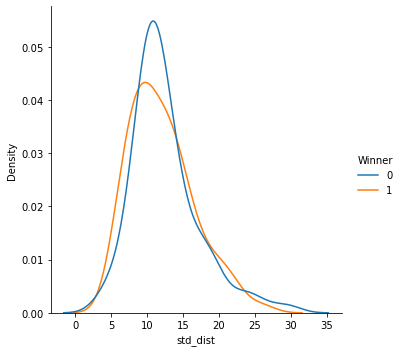

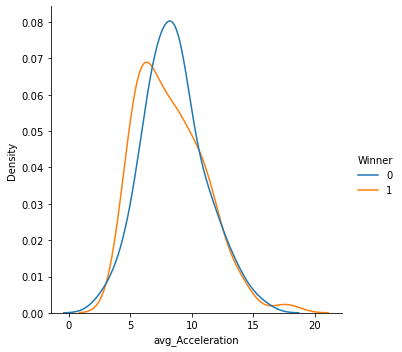

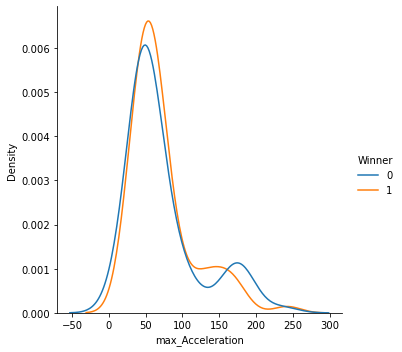

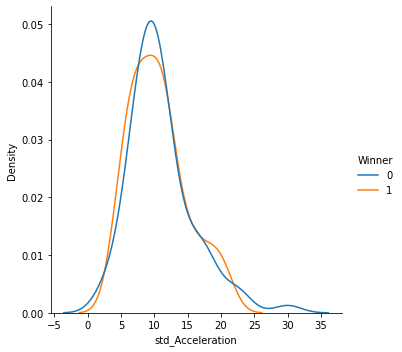

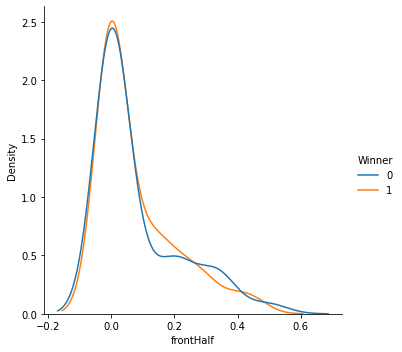

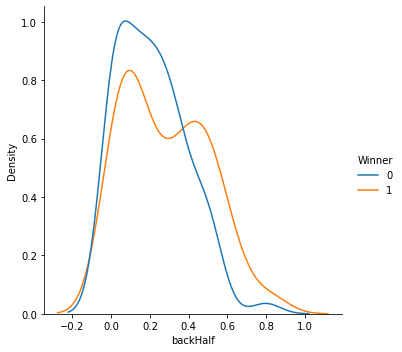

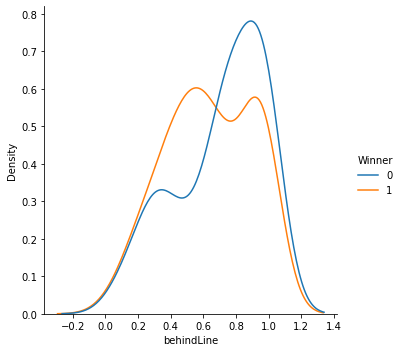

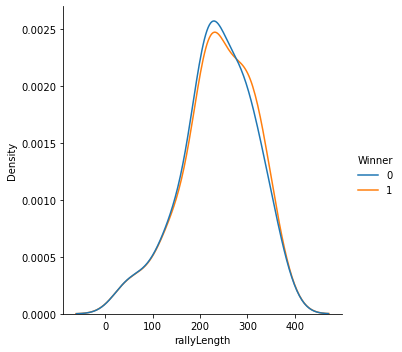

In [ ]:
for i in num:
    sns.displot(x= i,hue='Winner',kind = 'kde', data = playerStats)


In [ ]:
train.groupby(['Server','Winner'])['Winner'].count()

Server  Winner
0       0         26
        1         36
1       0         30
        1         29
Name: Winner, dtype: int64

## Pipelines

In [ ]:
#Split X and Y of data. Drop depth and table

trainY = train['Winner'].copy(deep=True)
trainX = train.drop('Winner',axis = 1)

testY = test['Winner'].copy(deep=True)
testX = test.drop('Winner',axis =1 )

In [ ]:
preprocessing = ColumnTransformer([
    ('scaler', StandardScaler(), num),
],remainder= 'passthrough')



In [ ]:
modelList = [KNeighborsClassifier(),
                GaussianNB(),
                SVC(probability=True),
                DecisionTreeClassifier(),
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
                LinearDiscriminantAnalysis(),
                MLPClassifier(max_iter = 800),
                LogisticRegression(max_iter = 600),
                RandomForestClassifier()]


In [ ]:
modelPipelines = {}


for i in modelList:
    modelPipe = Pipeline([
    ('colTrans', preprocessing),
    ('regressor', i)
    ])
    
    modelPipelines[str(i)] = modelPipe

In [ ]:
resultsList = []
modelNames = []

for key,value in modelPipelines.items():
    model = value.fit(trainX,trainY)
    predY = model.predict(testX)
    predYprob = model.predict_proba(testX)
    # kfold training Accuracy
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, trainX, trainY, cv=kfold, scoring='accuracy')
    
    print("Model: " + key)
    acc = round(accuracy_score(testY, predY),2)
    print("Accuracy: " + str(acc))
    prec = round(precision_score(testY, predY),2)
    print("Precision: " + str(prec))
    recall = round(recall_score(testY, predY),2)
    print("Recall: " + str(recall))
    f1 = round(f1_score(testY,predY),2)
    print("F1 Score: " + str(f1))
    rocAuc = round(roc_auc_score(testY, predYprob[:,1]),2)
    print("AUC: " + str(rocAuc))
    print("Training CV Accuracy: ")
    print(cv_results.mean())
    print('\n')
    
    resultsList.append([acc,prec,recall,f1,rocAuc])
    modelNames.append(str(key))

Model: KNeighborsClassifier()
Accuracy: 0.55
Precision: 0.4
Recall: 0.55
F1 Score: 0.46
AUC: 0.5
Training CV Accuracy: 
0.5769230769230769


Model: GaussianNB()
Accuracy: 0.35
Precision: 0.3
Recall: 0.64
F1 Score: 0.41
AUC: 0.47
Training CV Accuracy: 
0.5448717948717949


Model: SVC(probability=True)
Accuracy: 0.61
Precision: 0.47
Recall: 0.82
F1 Score: 0.6
AUC: 0.68
Training CV Accuracy: 
0.5942307692307691


Model: DecisionTreeClassifier()
Accuracy: 0.61
Precision: 0.47
Recall: 0.73
F1 Score: 0.57
AUC: 0.64
Training CV Accuracy: 
0.5608974358974359


Model: AdaBoostClassifier()
Accuracy: 0.35
Precision: 0.26
Recall: 0.45
F1 Score: 0.33
AUC: 0.41
Training CV Accuracy: 
0.5769230769230769


Model: GradientBoostingClassifier()
Accuracy: 0.48
Precision: 0.35
Recall: 0.55
F1 Score: 0.43
AUC: 0.45
Training CV Accuracy: 
0.5602564102564103


Model: LinearDiscriminantAnalysis()
Accuracy: 0.68
Precision: 0.53
Recall: 0.82
F1 Score: 0.64
AUC: 0.82
Training CV Accuracy: 
0.5782051282051281




c:\users\mrphi\appdata\local\programs\python\python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: MLPClassifier(max_iter=800)
Accuracy: 0.58
Precision: 0.43
Recall: 0.55
F1 Score: 0.48
AUC: 0.69
Training CV Accuracy: 
0.6275641025641027


Model: LogisticRegression(max_iter=600)
Accuracy: 0.71
Precision: 0.56
Recall: 0.82
F1 Score: 0.67
AUC: 0.78
Training CV Accuracy: 
0.5942307692307692


Model: RandomForestClassifier()
Accuracy: 0.48
Precision: 0.35
Recall: 0.55
F1 Score: 0.43
AUC: 0.54
Training CV Accuracy: 
0.5865384615384615




In [ ]:
classResults = pd.DataFrame(resultsList, columns=['Accuracy','Precision','Recall','F1','AUC'], index = modelNames)
classResults


,Accuracy,Precision,Recall,F1,AUC
KNeighborsClassifier(),0.55,0.40,0.55,0.46,0.50
GaussianNB(),0.35,0.30,0.64,0.41,0.47
SVC(probability=True),0.61,0.47,0.82,0.60,0.68
DecisionTreeClassifier(),0.65,0.50,0.82,0.62,0.68
AdaBoostClassifier(),0.35,0.26,0.45,0.33,0.41
GradientBoostingClassifier(),0.48,0.35,0.55,0.43,0.45
LinearDiscriminantAnalysis(),0.68,0.53,0.82,0.64,0.82
MLPClassifier(),0.58,0.44,0.64,0.52,0.64
LogisticRegression(),0.71,0.56,0.82,0.67,0.78
RandomForestClassifier(),0.45,0.33,0.55,0.41,0.55


### Identifying Best features using Log Regression Classifier

In [ ]:
lrPipe = Pipeline([
    ('colTrans', preprocessing),
    ('regressor', LogisticRegression())
    ])

In [ ]:
lrPipe.get_params()

{'memory': None,
 'steps': [('colTrans',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('scaler', StandardScaler(),
                                    Index(['Court', 'min_fromNet', 'avg_fromNet', 'max_fromNet', 'std_fromNet',
          'min_fromCentre', 'avg_fromCentre', 'max_fromCentret',
          'std_fromCentret', 'avg_dist', 'max_dist', 'std_dist',
          'avg_Acceleration', 'max_Acceleration', 'std_Acceleration', 'frontHalf',
          'backHalf', 'behindLine', 'rallyLength'],
         dtype='object'))])),
  ('regressor', LogisticRegression())],
 'verbose': False,
 'colTrans': ColumnTransformer(remainder='passthrough',
                   transformers=[('scaler', StandardScaler(),
                                  Index(['Court', 'min_fromNet', 'avg_fromNet', 'max_fromNet', 'std_fromNet',
        'min_fromCentre', 'avg_fromCentre', 'max_fromCentret',
        'std_fromCentret', 'avg_dist', 'max_dist', 'std_dist',
        'avg_Acceleration', '

In [ ]:
lrParam = {
    'regressor__penalty': ['l1','l2'],
    'regressor__C': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'regressor__max_iter': [100,200],
    'regressor__solver': [ 'liblinear']
}


grid_search = GridSearchCV(lrPipe, lrParam, cv = 10, scoring = 'accuracy',return_train_score=True,verbose = 1)

In [ ]:
grid_search.fit(trainX, trainY)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('colTrans',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         Index(['Court', 'min_fromNet', 'avg_fromNet', 'max_fromNet', 'std_fromNet',
       'min_fromCentre', 'avg_fromCentre', 'max_fromCentret',
       'std_fromCentret', 'avg_dist', 'max_dist', 'std_dist',
       'avg_Acceleration', 'max_Acceleration', 'std_Acceleration', 'frontHalf',
       'backHalf', 'behindLine', 'rallyLength'],
      dtype='object'))])),
                                       ('regressor', LogisticRegression())]),
             param_grid={'regressor__C': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'regressor__max_iter': [100, 200],
                         'regr

In [ ]:
grid_search.best_params_

{'regressor__C': 0.1,
 'regressor__max_iter': 100,
 'regressor__penalty': 'l1',
 'regressor__solver': 'liblinear'}

In [ ]:
predY  = grid_search.best_estimator_.predict(testX)
predYprob = grid_search.best_estimator_.predict_proba(testX)

print("Logistic Regression Results ")
acc = round(accuracy_score(testY, predY),4)
print("Accuracy: " + str(acc))
prec = round(precision_score(testY, predY),4)
print("Precision: " + str(prec))
recall = round(recall_score(testY, predY),4)
print("Recall: " + str(recall))
f1 = round(f1_score(testY,predY),4)
print("F1 Score: " + str(f1))
rocAuc = round(roc_auc_score(testY, predYprob[:,1]),4)
print("AUC: " + str(rocAuc))

Logistic Regression Results 
Accuracy: 0.5484
Precision: 0.4118
Recall: 0.6364
F1 Score: 0.5
AUC: 0.6545


In [ ]:
grid_search.best_estimator_.named_steps['regressor'].coef_[0]

array([-0.28673198,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.01764456,  0.        ,  0.        ,  0.00142867,
        0.        ,  0.        ])

In [ ]:
trainX.columns

Index(['matchID', 'Court', 'min_fromNet', 'avg_fromNet', 'max_fromNet',
       'std_fromNet', 'min_fromCentre', 'avg_fromCentre', 'max_fromCentret',
       'std_fromCentret', 'avg_dist', 'max_dist', 'std_dist',
       'avg_Acceleration', 'max_Acceleration', 'std_Acceleration', 'frontHalf',
       'backHalf', 'behindLine', 'rallyLength', 'Gender', 'Server'],
      dtype='object')

#### LogRegression

In [ ]:
modelPipe = Pipeline([
    ('colTrans', preprocessing),
    ('regressor', LogisticRegression(max_iter = 600))
    ])

model = modelPipe.fit(trainX,trainY)
predY = model.predict(testX)
predYprob = model.predict_proba(testX)
# kfold training Accuracy
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, trainX, trainY, cv=kfold, scoring='accuracy')

print("Model: LogisticRegression()")
acc = round(accuracy_score(testY, predY),2)
print("Accuracy: " + str(acc))
prec = round(precision_score(testY, predY),2)
print("Precision: " + str(prec))
recall = round(recall_score(testY, predY),2)
print("Recall: " + str(recall))
f1 = round(f1_score(testY,predY),2)
print("F1 Score: " + str(f1))
rocAuc = round(roc_auc_score(testY, predYprob[:,1]),2)
print("AUC: " + str(rocAuc))
print("Training CV Accuracy: ")
print(cv_results.mean())
print('\n')

Model: LogisticRegression()
Accuracy: 0.61
Precision: 0.47
Recall: 0.64
F1 Score: 0.54
AUC: 0.75
Training CV Accuracy: 
0.6275641025641026




In [ ]:
trainX.columns

Index(['matchID', 'Court', 'min_fromNet', 'avg_fromNet', 'max_fromNet',
       'std_fromNet', 'min_fromCentre', 'avg_fromCentre', 'max_fromCentret',
       'std_fromCentret', 'avg_dist', 'max_dist', 'std_dist',
       'avg_Acceleration', 'max_Acceleration', 'std_Acceleration', 'frontHalf',
       'backHalf', 'behindLine', 'rallyLength', 'Gender', 'Server'],
      dtype='object')

In [ ]:
model.named_steps['regressor'].coef_[0]

array([-0.87865625, -0.44416273,  0.12948452,  0.08445411, -0.21745551,
       -0.66466104,  0.44748527, -0.12122238, -0.01709999, -0.98031684,
        0.53175478, -0.27636344,  1.25420719, -0.38580509, -0.08676008,
       -0.29308593,  0.40851029, -0.17367249,  0.03937554, -0.00813195,
        0.11255371, -0.88728643])

## SUMMARY

Final Model - which one and why
Results - Issues with results
Interpretations - Discuss the small sample and the issues with gridsearch on such a small sample
Any interesting findings.
Future use - With more data, whether more information can be obtained and if that would yield better accuracy. 